In [5]:

from collections import defaultdict
import matplotlib.pyplot as plt
import pymysql

from enum import Enum
import matplotlib.dates as mdates
from datetime import datetime
from bs4 import BeautifulSoup

import sys
sys.path.insert(0, '/path/to/application/app/folder')
import psw

linkedin = "linkedin"
kijiji = "kijiji"
careerjet = "careerjet"

class Source(Enum):
    LINKEDIN = "b"
    CAREER = "r"
    KIJIJI = "y"


def get_data(datalist ,pk):
    for ds in datalist:
        if ds[0] == pk:
            return ds[1]
    return None

def get_all_data():
    cursor = db.cursor()
    cursor.execute("SELECT id, source, time, data FROM myDashboard_data_dump order by time desc")
    res = cursor.fetchall()
    return res

def map_source(link):
    if linkedin in link:
        return Source.LINKEDIN.value
    elif careerjet in link:
        return Source.CAREER.value
    elif kijiji in link:
        return Source.KIJIJI.value
    else:
        return 0


def enumerate_link(link):
    if not link in links:
        links.append(link)


def load_data_dump():
    res = defaultdict(list)
    cursor = db.cursor()
    cursor.execute("SELECT id, source, time from myDashboard_data_dump")
    dump = cursor.fetchall()

    for ds in dump:
        enumerate_link(ds[1])

    count = 0
    for ds in dump:
        link = ds[1]
        source = map_source(link)
        res["pk"].append( ds[0] )
        res["link"].append( links.index(link) )
        res["timesaved"].append( ds[2] )
        res["source"].append( map_source(link) )
        res["label"].append( Source(map_source(link)).name )
        count += 1
    print(str(count) + " lines loaded \n")
    return res

print( "connecting to server...\n")
db = pymysql.connect("colarietitosti.info" ,"cola", psw() ,"dashDB" )
print("connected!\n")
links = []

print("downloading data...")
start = datetime.now()
data = get_all_data()
# dd = load_data_dump()
end = datetime.now()
print("data loaded in ", end="")
print(end -start)

print( "\ndisconnecting from server.. ")
db.close()

print("parsing data ...")

ids = []
sources = []
times = []
datas = []

res = {
    "id" : ids,
    "source" : sources,
    "time" : times,
    "data" : datas,
}

known_sources = []
emails = {}
ret = ""
count = 0

for j in data:
    pk = j[0]
    source = j[1]
    time = j[2]
    data = j[3]

    if source in known_sources:
        continue
    else:
        known_sources.append(source)

    datasoup = BeautifulSoup(data, "html.parser")
    if "career" in source:
        description = datasoup.find("div", class_="advertise_compact").text
    elif "linkedin" in source:
        description = datasoup.find("div", class_="description__text").text
    elif "kijiji" in source:
        for li in datasoup.find_all("li"):
            loc = li.find("p", class_="locale")
            if loc is None:
                continue
            description = li.find("p", class_="description").text      
      
            ret += description
        continue
    else:
        description = ""

    ret += description
    
    ids.append(pk)
    sources.append(source)
    times.append(time)
    datas.append(data)
    count += 1

print(res)
from pandas import DataFrame
colums = ["id", "source","time","data"]
df = DataFrame(res, columns=columns)

export_csv = df.to_csv ('data.csv', index = None, header=True) 

print (df)


connecting to server...

connected!

downloading data...
data loaded in 0:00:02.630729

disconnecting from server.. 
parsing data ...


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        id                                             source  \
0    26003  https://www.careerjet.it/job/7f09b901434ca5c0e...   
1    26002  https://www.careerjet.it/job/c58715bb94957a708...   
2    26001  https://www.careerjet.it/wcerca/lavoro?s=progr...   
3    25999  https://it.linkedin.com/jobs/view/major-incide...   
4    25998  https://it.linkedin.com/jobs/view/responsabile...   
5    25997  https://it.linkedin.com/jobs/view/manufacturin...   
6    25996  https://it.linkedin.com/jobs/view/ingegenere-g...   
7    25995  https://it.linkedin.com/jobs/view/iot-develope...   
8    25994  https://it.linkedin.com/jobs/view/fresatore-cn...   
9    25993  https://it.linkedin.com/jobs/view/software-dev...   
10   25992  https://it.linkedin.com/jobs/view/ingegnere-ri...   
11   25991  https://it.linkedin.com/jobs/view/tecnico-comm...   
12   25990  https://it.linkedin.com/jobs/view/customer-hel...   
13   25989  https://it.linkedin.com/jobs/view/sistemista-w...   
14   25988  https://it.li

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 4 columns):
id        190 non-null int64
source    190 non-null object
time      190 non-null object
data      190 non-null object
dtypes: int64(1), object(3)
memory usage: 6.0+ KB
  (0, 3502)	1
  (0, 4446)	1
  (0, 4012)	1
  (0, 6125)	1
  (0, 2027)	1
  (0, 3024)	1
  (0, 3944)	6
  (0, 7399)	1
  (0, 6803)	1
  (0, 3955)	4
  (0, 932)	1
  (0, 2959)	1
  (0, 2944)	1
  (0, 6003)	1
  (0, 8089)	1
  (0, 1617)	1
  (0, 6891)	1
  (0, 5372)	2
  (0, 8087)	1
  (0, 8327)	1
  (0, 5459)	3
  (0, 2319)	7
  (0, 7007)	1
  (0, 2395)	3
  (0, 3455)	3
  :	:
  (189, 6558)	1
  (189, 5274)	23
  (189, 5354)	1
  (189, 7484)	58
  (189, 3554)	1
  (189, 4201)	2
  (189, 1520)	7
  (189, 8084)	5
  (189, 2585)	5
  (189, 7308)	69
  (189, 2901)	15
  (189, 5112)	8
  (189, 4146)	2
  (189, 4574)	14
  (189, 4729)	1
  (189, 2075)	2
  (189, 2191)	1
  (189, 3498)	1
  (189, 11)	1
  (189, 1368)	1
  (189, 3368)	1
  (189, 8247)	1
  (189, 6157)	1
 

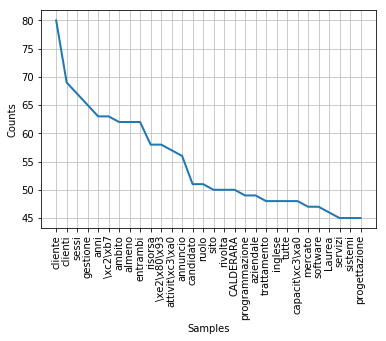

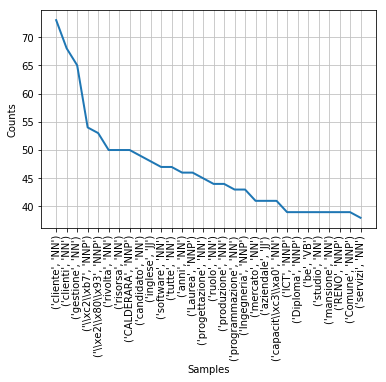

In [20]:
import nltk
import re
from bs4 import BeautifulSoup
import mechanicalsoup
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

stopwords_ita = ["é", "io", "noi", "voi", "il", "lo", "la", "i", "gli", "le", "di",
                 "in", "e", "and", "a", "per", "\\xc2\\xa0", "the", "del", "con", "della", "of", "to", "al", "o",
                 "ad", "ai", "-", "dei", "un", "delle", "si", "lavoro", "una", "che", "sensi", "with",
                 "ricerca", "ed", "nella", "alla", "la", "di", "si", "su", "is", "a", "nel", "sul", "da", "(bo)",
                 "e/o", "lingua", "for", "lavoro", "tempo", "\\xc3\\xa8", "buona", "azienda", "conoscenza",
                 "esperienza", "settore","team", "," , "'", ";", ".", ")", "(", ":", "bo", "bologna", "dati",
                 "https", "&", "richiede", "903/77", "candidati", "sviluppo", "@", "are", "sono", "sulla", 
                 "inviare", "degli", '77', '903', 'xa0', 'xa8', 'xc2', 'xc3']

df = pd.read_csv("data.csv")
df.info()

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words=stopwords_ita, tokenizer = token.tokenize)
text_counts= cv.fit_transform(df.data)

# print(text_counts)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

print("\npreparing ...")
tokens = nltk.word_tokenize(ret)
clean_tokens = tokens[:]
for token in tokens:
    if token.lower() in stopwords_ita:
        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)
print("plotting ...")
freq.plot(30, cumulative=False)

tag1 = nltk.pos_tag(clean_tokens)
freq = nltk.FreqDist(tag1)
freq.plot(30, cumulative=False)

#data=pd.read_csv('train.tsv', sep='\t')



In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')